### Importing needed packages

In [171]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Reading the data from CSV file 

In [172]:
df = pd.read_csv("cars_clus.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   157 non-null    object 
 1   model      159 non-null    object 
 2   sales      159 non-null    object 
 3   resale     159 non-null    object 
 4   type       159 non-null    object 
 5   price      159 non-null    object 
 6   engine_s   159 non-null    object 
 7   horsepow   159 non-null    object 
 8   wheelbas   159 non-null    object 
 9   width      159 non-null    object 
 10  length     159 non-null    object 
 11  curb_wgt   159 non-null    object 
 12  fuel_cap   159 non-null    object 
 13  mpg        159 non-null    object 
 14  lnsales    159 non-null    object 
 15  partition  159 non-null    float64
dtypes: float64(1), object(15)
memory usage: 20.0+ KB


In [173]:
df.head(10)

manufact    model   sales  resale  ... fuel_cap     mpg lnsales partition
0    Acura  Integra  16.919  16.360  ...   13.200  28.000   2.828       0.0
1    Acura       TL  39.384  19.875  ...   17.200  25.000   3.673       0.0
2    Acura       CL  14.114  18.225  ...   17.200  26.000   2.647       0.0
3    Acura       RL   8.588  29.725  ...   18.000  22.000   2.150       0.0
4     Audi       A4  20.397  22.255  ...   16.400  27.000   3.015       0.0
5     Audi       A6  18.780  23.555  ...   18.500  22.000   2.933       0.0
6     Audi       A8   1.380  39.000  ...   23.700  21.000   0.322       0.0
7      BMW     323i  19.747  $null$  ...   16.600  26.100   2.983       0.0
8      BMW     328i   9.231  28.675  ...   16.600  24.000   2.223       0.0
9      BMW     528i  17.527  36.125  ...   18.500  24.800   2.864       0.0

[10 rows x 16 columns]

In [174]:
df[["resale"]].value_counts

<bound method DataFrame.value_counts of      resale
0    16.360
1    19.875
2    18.225
3    29.725
4    22.255
..      ...
154  $null$
155  $null$
156  $null$
157  $null$
158  $null$

[159 rows x 1 columns]>

## Cleaning the dataset by droping the rows containing NULL values

In [175]:

df.columns

Index(['manufact', 'model', 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition'],
      dtype='object')

In [176]:

print(f"shape of dataset before cleaning:\n{df.size}")
# Convert selected columns to numeric types
# If conversion fails (e.g., text instead of numbers), set as NaN (missing value)


df[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']]= df[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors="coerce")
       
# Drop all rows with any missing values (NaNs)       
df = df.dropna()    

# Reset the index after dropping rows (to make it continuous from 0)
df = df.reset_index(drop=True)
df.head()

shape of dataset before cleaning:
2544


manufact    model   sales  resale  ...  fuel_cap   mpg  lnsales  partition
0    Acura  Integra  16.919  16.360  ...      13.2  28.0    2.828        0.0
1    Acura       TL  39.384  19.875  ...      17.2  25.0    3.673        0.0
2    Acura       RL   8.588  29.725  ...      18.0  22.0    2.150        0.0
3     Audi       A4  20.397  22.255  ...      16.4  27.0    3.015        0.0
4     Audi       A6  18.780  23.555  ...      18.5  22.0    2.933        0.0

[5 rows x 16 columns]

### Select some feature of the dataset to work on 

In [177]:
featured_set = df[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

featured_set.head()

engine_s  horsepow  wheelbas  width  length  curb_wgt  fuel_cap   mpg
0       1.8     140.0     101.2   67.3   172.4     2.639      13.2  28.0
1       3.2     225.0     108.1   70.3   192.9     3.517      17.2  25.0
2       3.5     210.0     114.6   71.4   196.6     3.850      18.0  22.0
3       1.8     150.0     102.6   68.2   178.0     2.998      16.4  27.0
4       2.8     200.0     108.7   76.1   192.0     3.561      18.5  22.0

### Normalization

In [178]:
from sklearn.preprocessing import MinMaxScaler

x = np.array(featured_set) # Tp return a numpy array
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x[:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

### Clustering using scikit-learn

In [179]:
clustering  = AgglomerativeClustering(n_clusters=6, linkage="complete")
clustering.fit(x)

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [180]:
labels = clustering.labels_
labels

array([1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 5, 1,
       4, 1, 1, 2, 1, 2, 1, 1, 1, 5, 0, 0, 0, 3, 2, 1, 2, 1, 2, 3, 2, 3,
       0, 3, 0, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 3, 5, 1, 1, 2, 3, 2, 1, 3,
       2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1])

In [181]:
df["cluster"] = labels
df.head(10)

manufact    model   sales  resale  ...   mpg  lnsales  partition  cluster
0    Acura  Integra  16.919  16.360  ...  28.0    2.828        0.0        1
1    Acura       TL  39.384  19.875  ...  25.0    3.673        0.0        2
2    Acura       RL   8.588  29.725  ...  22.0    2.150        0.0        2
3     Audi       A4  20.397  22.255  ...  27.0    3.015        0.0        1
4     Audi       A6  18.780  23.555  ...  22.0    2.933        0.0        2
5     Audi       A8   1.380  39.000  ...  21.0    0.322        0.0        3
6      BMW     328i   9.231  28.675  ...  24.0    2.223        0.0        1
7      BMW     528i  17.527  36.125  ...  24.8    2.864        0.0        2
8    Buick  Century  91.561  12.475  ...  25.0    4.517        0.0        2
9    Buick    Regal  39.350  13.740  ...  23.0    3.672        0.0        2

[10 rows x 17 columns]

C:\Users\sasan\AppData\Local\Temp\ipykernel_18100\384819259.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

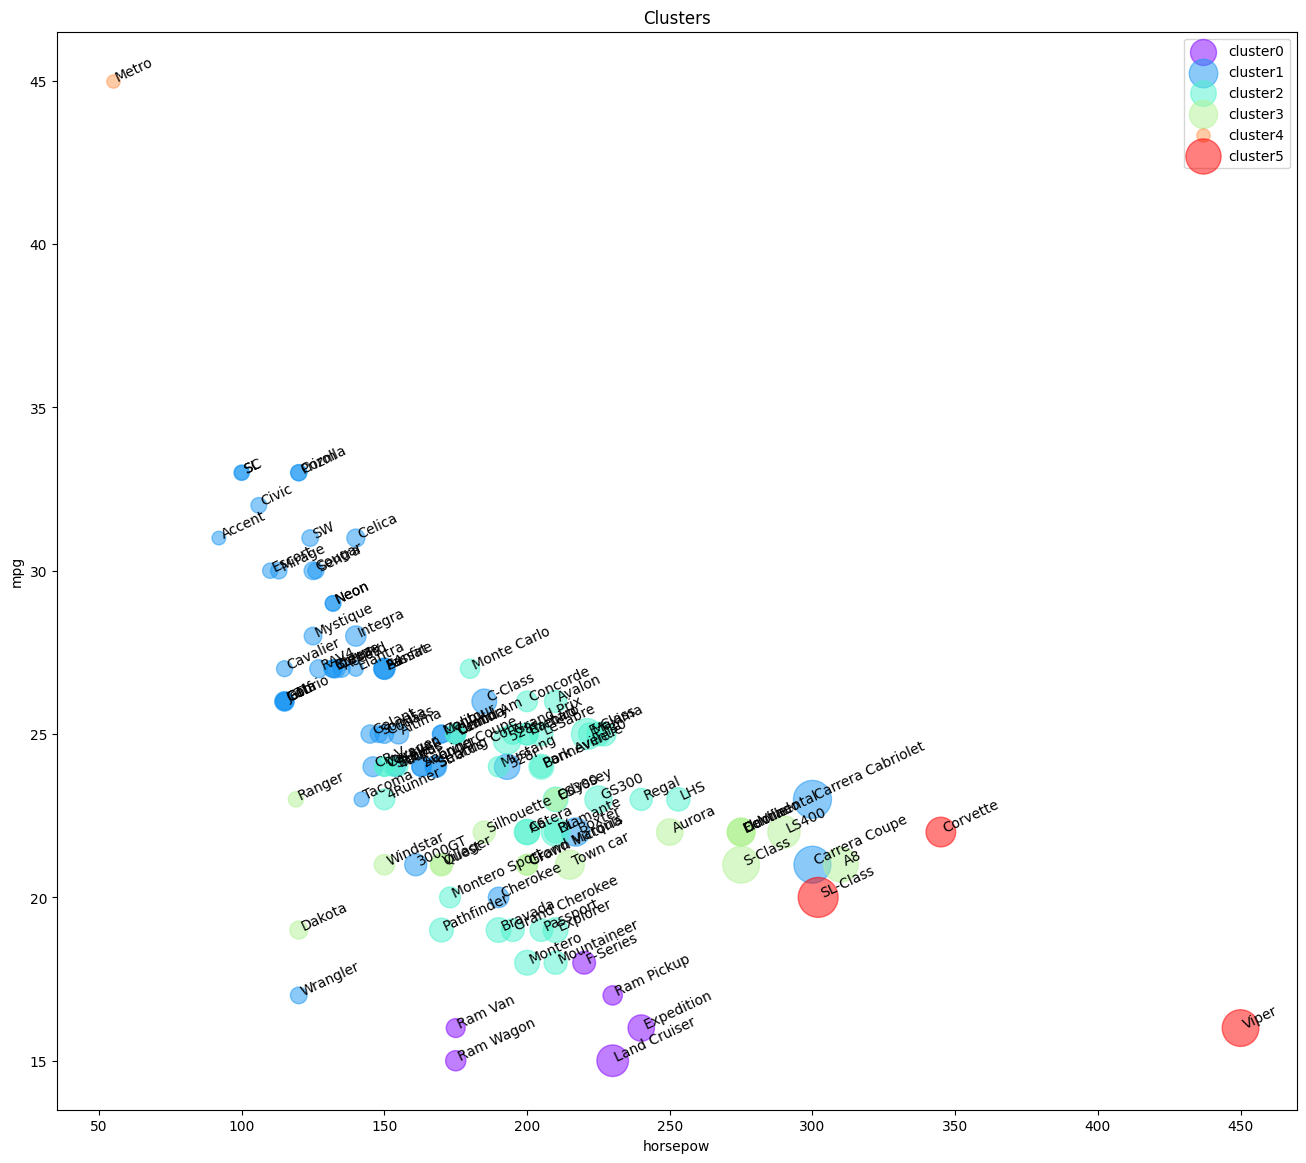

In [182]:
import matplotlib.cm as cm

n_clusters = max(clustering.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [185]:
df.groupby(['cluster','type'])['cluster'].count()

cluster  type
0        1.0      6
1        0.0     47
         1.0      5
2        0.0     27
         1.0     11
3        0.0     10
         1.0      7
4        0.0      1
5        0.0      3
Name: cluster, dtype: int64

In [188]:
agg_cars = df.groupby(['cluster','type'])[['horsepow','engine_s','mpg','price']].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster type                                            
0       1.0   211.666667  4.483333  16.166667  29.024667
1       0.0   146.531915  2.246809  27.021277  20.306128
        1.0   145.000000  2.580000  22.200000  17.009200
2       0.0   203.111111  3.303704  24.214815  27.750593
        1.0   182.090909  3.345455  20.181818  26.265364
3       0.0   256.500000  4.410000  21.500000  42.870400
        1.0   160.571429  3.071429  21.428571  21.527714
4       0.0    55.000000  1.000000  45.000000   9.235000
5       0.0   365.666667  6.233333  19.333333  66.010000

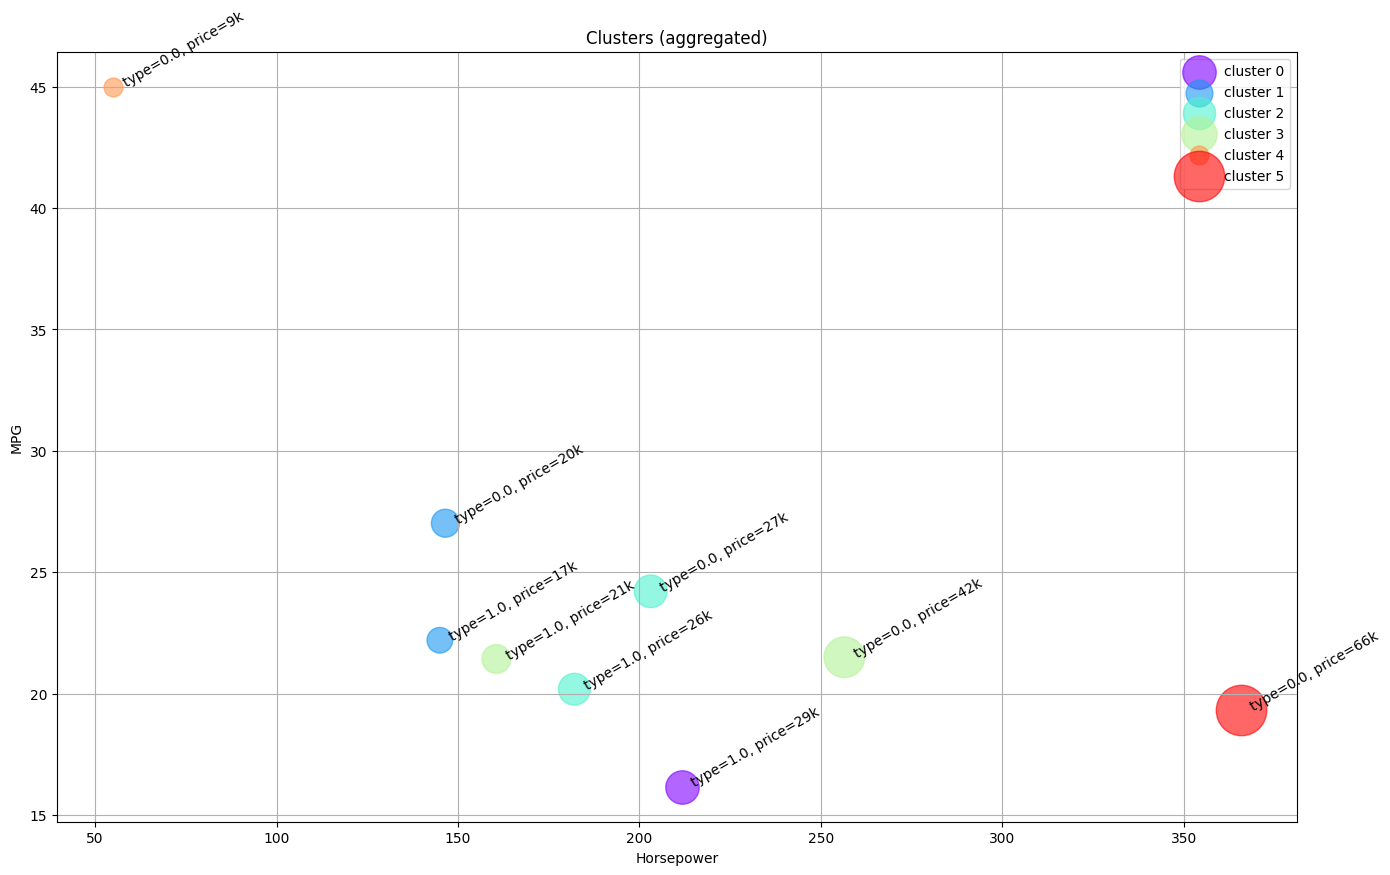

In [190]:
plt.figure(figsize=(16,10))

# Loop through each cluster
for color, label in zip(colors, cluster_labels):
    # Select all rows with current cluster
    subset = agg_cars.loc[label]
    
    # Loop through each car type inside the cluster
    for i in subset.index:
        # Add text label near each point
        plt.text(subset.loc[i]['horsepow'] + 2, 
                 subset.loc[i]['mpg'], 
                 f'type={i}, price={int(subset.loc[i]["price"])}k',
                 rotation=30)

    # Plot scatter points
    plt.scatter(subset['horsepow'], subset['mpg'], 
                s=subset['price']*20, 
                c=[color], 
                label=f'cluster {label}', 
                alpha=0.6)

plt.legend()
plt.title('Clusters (aggregated)')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.grid(True)
plt.show()


### Visulizing the Dendrogram

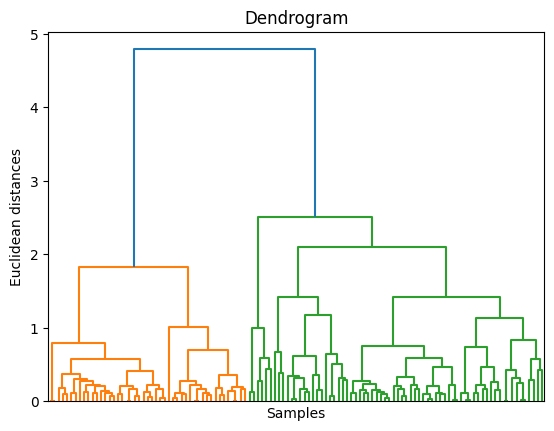

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Your dendrogram
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')

plt.xticks([], [])  #This hides all x-axis text

plt.show()

